# **NUMERICAL TOOLS FOR QUANTITATIVE FINANCE**
# -----Additional topics-----
---
<img src="../Imperial_logo.png" align = "left" width=200>
<br><br>
 
- Copyright (c) Antoine Jacquier, 2024. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

In [11]:
import numpy as np

# Matrix algebra

We consider vectors $u,v \in \mathbb{R}^n$ and matrices $A \in \mathcal{M}_{m,n}(\mathbb{R})$
and $B \in \mathcal{M}_{n,p}(\mathbb{R})$.

These can be created directly as `numpy.array` and standard linear algebra computations apply.

### Vectors as `numpy.array`

In [35]:
uu = np.array([1,2,3])

print("Vector u:", uu)
print("Length of the vector u:", len(uu))
print("Shape of the vector u:", uu.shape)

Vector u: [1 2 3]
Length of the vector u: 3
Shape of the vector u: (3,)


In [94]:
uu = np.array([1, 2, 3])
vv = np.array([-1, -2, -3])

print(2.*uu)
print(uu.T)
print(uu*vv)

[2. 4. 6.]
[1 2 3]
[-1 -4 -9]


Is it really what you expect from linear algebra?

## Vectors as `numpy.matrix`

In [46]:
uu = np.matrix([1,2,3])

print("Vector u:", uu)
print("Length of the vector u:", len(uu))
print("Shape of the vector u:", uu.shape)

Vector u: [[1 2 3]]
Length of the vector u: 1
Shape of the vector u: (1, 3)


In [69]:
uu = np.matrix([1, 2, 3])
vv = np.matrix([-1, -2, -3])

print(2.*uu)
print(uu.T)

[[2. 4. 6.]]
[[1]
 [2]
 [3]]


Here, vectors were defined as matrices in one dimension.

We can of course define (classical) matrices in two dimensions:

In [51]:
A = np.matrix([[1,2,3],[4,5,6],[7,8,9], [10, 11, 12]])

print("Matrix A: \n", A)
print("Shape of A:",A.shape)
print("Number of rows in A:",A.shape[0])
print("Number of columns in A:",A.shape[1])

Matrix A: 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Shape of A: (4, 3)
Number of rows in A: 4
Number of columns in A: 3


In [72]:
uu = np.matrix([1, 2, 3])
print("Shape of A:",A.shape)
print("Shape of u:",uu.shape)

print("Transpose of A:", A.T)
print("***********")
print("Product A*u.T", A*uu)

Shape of A: (2, 1)
Shape of u: (1, 3)
Transpose of A: [[0.87217231 0.85225066]]
***********
Product A*u.T [[0.87217231 1.74434461 2.61651692]
 [0.85225066 1.70450131 2.55675197]]


From now on, we consider randomly generated vectors and matrices.

**WARNING:** operations have different meanings between `numpy.array` and `numpy.matrix`.

In [89]:
A = np.random.random((2, 1))
B = np.random.random((1, 2))
print(A, A.shape)
print("***********")
print(B, B.shape)
print("***********")
print(A*B, (A*B).shape)

[[0.64761549]
 [0.42299899]] (2, 1)
***********
[[0.81265201 0.87118869]] (1, 2)
***********
[[0.52628603 0.56419529]
 [0.34375098 0.36851193]] (2, 2)


In [90]:
B = np.matrix(B)
print(B, B.shape)
print("***********")
print(A*B, (A*B).shape)

[[0.81265201 0.87118869]] (1, 2)
***********
[[0.52628603 0.56419529]
 [0.34375098 0.36851193]] (2, 2)


The operation * above is not a matrix multiplication but a broadcastin operation.

In [91]:
A = np.random.random((2, 1))
B = np.random.random((2, 1))
print(A, A.shape)
print("***********")
print(B, B.shape)
print("***********")
print(A*B, (A*B).shape)

[[0.00538291]
 [0.36879491]] (2, 1)
***********
[[0.78158779]
 [0.14785099]] (2, 1)
***********
[[0.00420721]
 [0.05452669]] (2, 1)


In [92]:
B = np.matrix(B)
print(B, B.shape)
print("***********")
print(A*B, (A*B).shape)

[[0.78158779]
 [0.14785099]] (2, 1)
***********


ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

## The `numpy.dot` product

In [102]:
uu = np.random.random(2)
vv = np.random.random(2)
print("u:", uu)
print("v:", vv)
print("u*v:", uu*vv)
print("dot(u,v)", np.dot(uu, vv))

u: [0.17491084 0.1107286 ]
v: [0.71824685 0.30478171]
u*v: [0.12562916 0.03374805]
dot(u,v) 0.1593772138161033


## The `numpy.multiply` product

In [107]:
A = np.random.random((2, 1))
B = np.random.random((1, 2))
print(A, A.shape)
print("***********")
print(B, B.shape)
print("***********")
print(A*B, (A*B).shape)
print("***********")
print(np.multiply(A,B))

[[0.13450164]
 [0.35805181]] (2, 1)
***********
[[0.29248908 0.79429099]] (1, 2)
***********
[[0.03934026 0.10683344]
 [0.10472625 0.28439733]] (2, 2)
***********
[[0.03934026 0.10683344]
 [0.10472625 0.28439733]]


# Linear regression

Given a set of data points $(\boldsymbol{\mathrm{x}}_i,y_i)_{i=1,\ldots,n}$, 
for $y_i\in\mathbb{R}$ and $\boldsymbol{\mathrm{x}}_i\in \mathbb{R}^p$ for each $i=1,\ldots,n$, 
we want to determine the best linear regression model of the form
$$
y_i = \beta_1 x_{i,1} + \ldots + \beta_p x_{i,p} + \varepsilon_i
 = \sum_{j=1}^{p}\beta_{j} x_{i,j} + \varepsilon_i, 
\qquad\text{for }i=1,\ldots, n,
$$
for some $\boldsymbol{\beta}^\top = (\beta_1,\ldots,\beta_p)\in\mathbb{R}^{p}$, where the sequence $\boldsymbol{\varepsilon}^\top = (\varepsilon_1,\ldots,\varepsilon_n)$ forms an iid sequence of centered random noises with variance $\sigma^2>0$.
We can rewrite this in vector form as
$$
y_i = \boldsymbol{\mathrm{x}}_i^\top \boldsymbol{\beta} + \varepsilon_i,
$$
for each $i=1,\ldots,n$, or in matrix form
$$
\boldsymbol{\mathrm{y}} = \boldsymbol{\mathrm{x}}^\top \boldsymbol{\beta} + \boldsymbol{\varepsilon},
$$

The goal of the least square methods is to minimise the noise (or the error), namely to solve the minimisation problem
$$
\min_{\boldsymbol{\beta}}\left\|\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{x}}^\top \boldsymbol{\mathrm{\beta}}\right\|_2^2
= \min_{\boldsymbol{\beta}}\sum_{i=1}^{n}\left(y_i - \boldsymbol{\mathrm{x}}_i^\top \boldsymbol{\beta}\right)^2.
$$
Standard linear regression theory yields the optimal coefficient
$$
\boldsymbol{\beta}^* = \left(\boldsymbol{\mathrm{x}}^\top\boldsymbol{\mathrm{x}}\right)^{-1}\boldsymbol{\mathrm{x}}^\top\boldsymbol{\mathrm{y}}.
$$

### Numerical example

We import data from Yahoo Finance via the `yahoo_fin` module. We will come back later on this.

In [8]:
import yahoo_fin.stock_info as si
import matplotlib.pylab as plt
import numpy as np

In [9]:
ticker = "BTC-USD"

In [10]:
data = si.get_data(ticker)
data.head()

,open,high,low,close,adjclose,volume,ticker
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,BTC-USD
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,BTC-USD
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,BTC-USD
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,BTC-USD
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,BTC-USD


In [18]:
xlabel = "low"
ylabel = "high"

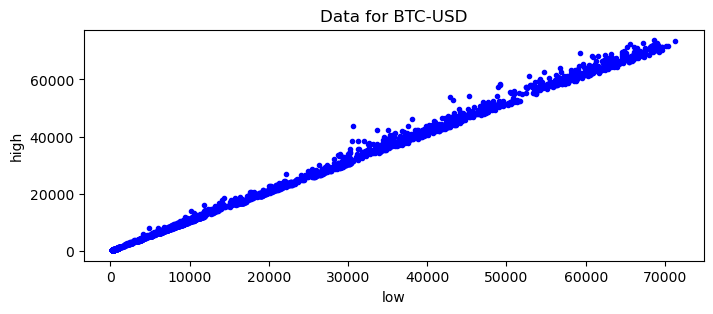

In [19]:
xx = np.array(data[xlabel])
yy = np.array(data[ylabel])
plt.figure(figsize=(8,3))
plt.plot(xx, yy, 'b.')
plt.title("Data for %s" %ticker)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

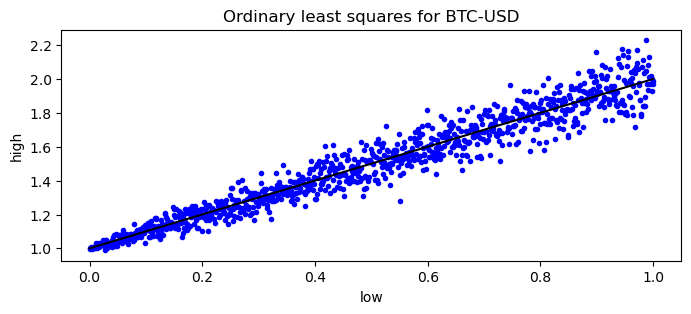

In [29]:
A = np.vstack([xx, np.ones(len(xx))]).T
yy2 = yy[:, np.newaxis]

# Direct least square regression
beta = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),yy2)

plt.figure(figsize = (8,3))
plt.plot(xx, yy2, 'b.')
plt.plot(xx, beta[0]*xx + beta[1], 'k')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("Ordinary least squares for %s" %ticker)
plt.show()

In [22]:
beta

array([[ 1.04613012],
       [27.05613299]])

## Test on simulated data

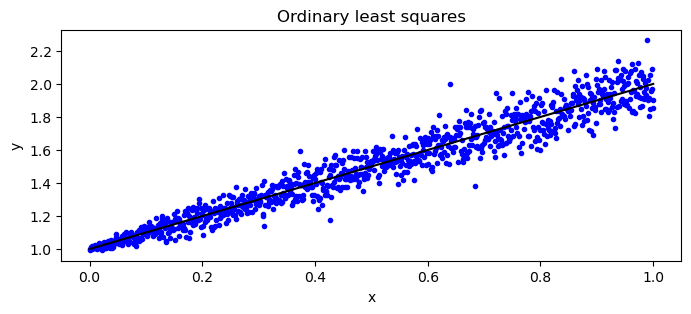

In [30]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

xx = np.linspace(0, 1, 1001)

yy = 1 + xx + .1*np.random.normal(0., 1., len(xx))*np.sqrt(xx)

A = np.vstack([xx, np.ones(len(xx))]).T
yy2 = yy[:, np.newaxis]

# Direct least square regression
beta = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),yy2)

plt.figure(figsize = (8,3))
plt.plot(xx, yy2, 'b.')
plt.plot(xx, beta[0]*xx + beta[1], 'k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ordinary least squares")
plt.show()

# Other numerical topics not covered

- linear and non-linear interpolation: https://docs.scipy.org/doc/scipy/tutorial/interpolate.html
- matrix inversion: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html
- spectral decomposition: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html